In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.0 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

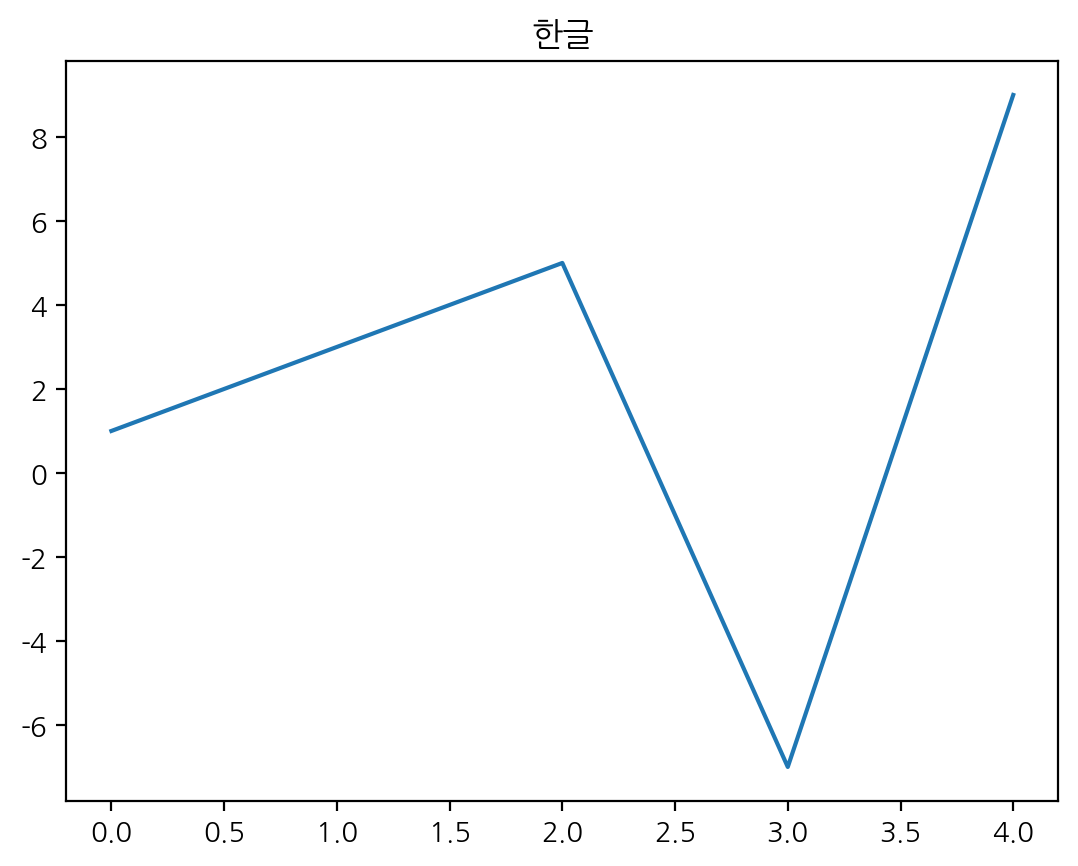

In [3]:
import koreanize_matplotlib
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [4]:
raw = pd.read_csv('/content/drive/MyDrive/mulcam_bigdata/data/new_year_dazim.csv')
df = raw.copy()
df.head()

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [5]:
df.shape

(2449, 1)

In [6]:
#  데이터 전처리

# 중복 여부 확인 >> 제거
# drop_duplicates

df = df.drop_duplicates(['text'], keep='last')
# 중복 제거 후, 마지막 글을 남김
df.shape

(2410, 1)

In [9]:
# (영문)소문자 변환
df['text'] = df['text'].str.lower()
df.head()

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!


In [10]:
# replace()
# >> 텍스트가 완전히 일치할 때 사용
# str.replace()
# >> 문자(열) 일부만 일치할 때, 원하는 텍스트로 변경 가능

df['text'] = df['text'].str.replace("python","파이썬")\
                       .str.replace("pandas","판다스")\
                       .str.replace("javascript","자바스크립트")\
                       .str.replace("java"," 자바")\
                       .str.replace("react", "리액트")

In [11]:
df.head(3)

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [18]:
# 문자열 분리로 관심 강의(기준) 분리
# 신사동, 신사 동 >> 신사동 통일 / 관심 강의, 관심 강좌 >> course
df['text'].apply(lambda x: x.split('관심 강의')[-1])
# 관심강의 기준 텍스트 분리, 관심강의 뒤에 있는 텍스트를 가져옴

# 텍스트 열에 있는 문자열을 처리 > lambda를 이용해 열의 각 요소에 함수를 적용
# 문자열 x를 '관심 강의'를 경계로 하여 여러 부분으로 나눔
# 리스트에서 마지막 부분 문자열을 선택 : '관심 강의' 이후에 나오는 모든 문자열을 의

0       2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1       2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...
3                   40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4                         2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5                       2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!
                              ...                        
2444    작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 ***님의 jpa 강의를 또 스...
2445    저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2446    에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...
2447    저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...
2448    인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...
Name: text, Length: 2410, dtype: object

In [20]:
# 'course' 새로운 변수 생성
# 'course' 는 전처리한 데이터
df['course'] = df['text'].apply(lambda x: x.split('관심 강의')[-1])
df['course'] = df['course'].apply(lambda x: x.split('관심강의')[-1])
df['course'] = df['course'].apply(lambda x: x.split('관심 강좌')[-1])

In [21]:
df.head(3)

,text,course
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [22]:
df['course'] = df['course'].str.replace(":","")
df['course'].head()

0    2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1    2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...
3                  40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
4                       2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
5                     2020 년목표 비전공자(경영)가 전공자(it) 되기!!!
Name: course, dtype: object

In [23]:
df.head(3)

,text,course
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급


In [24]:
# 특정 키워드가 들어가는 댓글을 찾기
search_keyword = ['머신러닝', '딥러닝', '파이썬', '판다스', '공공데이터',
                  'django', '크롤링', '시각화', '데이터분석',
                  '웹개발', '엑셀', 'c', '자바', '자바스크립트',
                  'node', 'vue', '리액트']

In [25]:
for keyword in search_keyword:
  df[keyword] = df['course'].str.contains(keyword)

In [26]:
df. head()

,text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
# 파이썬 | 공공데이터 | 판다스 라는 텍스트가 들어가 있는 데이터가 있나?

df[df['text'].str.contains('파이썬|공공데이터|판다스')]

,text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
21,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,파이썬 머신러닝 완벽가이드,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25,"#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기\n파...",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
29,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.\n#관심...,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,"마음으로는 모든 강의가 듣고싶지만, 한가지씩 해나가고싶습니다. 우선은 파이썬부터 시...",파이썬 사용자를 위한 웹개발 입문 a to z django + bootstrap,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
2432,주니어개발자입니다. 토이프로젝트를 꼭 해보고 싶습니다. 올해엔 자바스크립트기초를 탄...,"파이썬입문과 크롤링기초 부트캠프 [쉽게! 하지만, 견고한 자료로!],node.js로...",False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2435,"올해는 파이썬과 r을 자유롭게 사용하고 싶어요..\n데이타 마이닝과, 업무능률향상 ...","올해는 파이썬과 r을 자유롭게 사용하고 싶어요..\n데이타 마이닝과, 업무능률향상 ...",False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2447,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [28]:
# df_python : 파이썬|공공데이터|판다스이 포함된 행의 데이터프레임
df_python = df[df['text'].str.contains('파이썬|공공데이터|판다스')]
df_python.shape

(429, 19)

In [29]:
df[search_keyword]

,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2447,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [31]:
# 공공데이터 텍스트가 들어간 문장만 찾고 싶을때
df.loc[(df['공공데이터'] == True), 'text']
# loc[행, 열]

25      #관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...
29      자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.\n#관심...
52      올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..\n\n#관심강의: 공...
92      it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다....
299           파이썬 데이터분석 마스터\n#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
387     올해 졸업하는 컴퓨터공학과 학생입니다!\n백엔드 혹은 데이터 엔지니어 쪽으로 취업하...
572     텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확...
600     데이터분석 2년차가 되는데 작년에 파이썬 강의를 담아놓고 그대로 1년간 방치... ...
710     2020년에는 데이터 분석쪽으로 이직하고 싶어요! 인프런 강의 듣고 이직에 성공하고...
906     경영학과 졸업생입니다. 새해엔 엑셀! 파이썬! 취직! 해내겠습니다. 좋은 강의, 커...
1365    인프런으로 파이썬 기초문법부터 입문했어요! 실무 데이터분석에 활용할 수 있는 수준으...
1388    나만의 프로젝트 하나 완성할 수 있을 정도의 지식 쌓기!\n#관심강의:공공데이터로 ...
Name: text, dtype: object

In [32]:
# '판다스'라는 텍스트가 들어가는 내용만 찾음

df.loc[df['판다스'] == True, 'text']

541     2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다...
690     취미로 안드로이드 개발하는 사람입니다.  자바로 작성하다 보니, kotlin이 안드...
758            판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : *** 판다스
1237      2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
2155    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
2365    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

In [33]:
# 빈도수 계산을 위한 텍스트 데이터 벡터화(숫자변환)
# >> bow(bag of words) 토큰화 해서 담기

"파이썬 데이터 분석".split()

['파이썬', '데이터', '분석']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = None,     # 토큰나이저 따로 지정 가능
    preprocessor = None,  # 전처리 함수 따로 지정 가능
    stop_words = None,    # 불용어 따로 지정 가능
    min_df = 2,           # 단어가 최소 2개 문서에 나타나야 포함
    ngram_range = (3,6),  # 3-gram에서 6-gram까지의 단어 조합을 포함
    max_features = 2000   # 생성할 feature 수(단어 수)
                          # 최대 2000개의 단어를 특징으로 사용
)

In [36]:
vectorizer

CountVectorizer(max_features=2000, min_df=2, ngram_range=(3, 6))

In [37]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape

(2410, 2000)

In [38]:
feature_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
vocab = vectorizer.get_feature_names_out()
print(len(vocab))

2000


In [40]:
vocab[:10]

array(['12개 만들면서 배우는', '12개 만들면서 배우는 ios', '12개 만들면서 배우는 ios 아이폰',
       '12개 만들면서 배우는 ios 아이폰 개발', '12개를 만들며 배우는', '12개를 만들며 배우는 swift4',
       '12개를 만들며 배우는 swift4 ios11', '12개를 만들며 배우는 swift4 ios11 아이폰',
       '2018 do it', '2018 do it 안드로이드'], dtype=object)

In [42]:
# 각 review 마다 등장하는 단어에 빈도수가 표현됨(0 : 등장하지 않음)
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

# 3-gram에서 6-gram까지의 단어 조합을 포함

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
np.sum(feature_vector, axis = 0)
# 열끼리 합

matrix([[2, 2, 2, ..., 2, 2, 2]])

In [44]:
dist = np.sum(feature_vector, axis = 0)
pd.DataFrame(dist, columns = vocab)

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,2,2,2,2,2,2,2,2,2,2,...,16,13,13,12,2,8,8,2,2,2


In [45]:
df_freq = pd.DataFrame(dist, columns = vocab).T
df_freq

,0
12개 만들면서 배우는,2
12개 만들면서 배우는 ios,2
12개 만들면서 배우는 ios 아이폰,2
12개 만들면서 배우는 ios 아이폰 개발,2
12개를 만들며 배우는,2
...,...
활용한 리액트 native,8
활용한 리액트 native 개발,8
활용한 메신져 만들기,2
활용한 메신져 만들기 android,2


In [46]:
df_freq.columns

RangeIndex(start=0, stop=1, step=1)

In [47]:
df_freq.sort_values(by = 0, ascending = False).head(30)

,0
nodebird sns 만들기,60
스프링 데이터 jpa,59
리액트로 nodebird sns,49
머신러닝 완벽 가이드,49
리액트로 nodebird sns 만들기,49
파이썬 머신러닝 완벽,49
프로그래밍과 자바스크립트 es6,48
파이썬 머신러닝 완벽 가이드,48
함수형 프로그래밍과 자바스크립트 es6,47
2020년 공부 목표,47


In [48]:
df_freq.reset_index()

,index,0
0,12개 만들면서 배우는,2
1,12개 만들면서 배우는 ios,2
2,12개 만들면서 배우는 ios 아이폰,2
3,12개 만들면서 배우는 ios 아이폰 개발,2
4,12개를 만들며 배우는,2
...,...,...
1995,활용한 리액트 native,8
1996,활용한 리액트 native 개발,8
1997,활용한 메신져 만들기,2
1998,활용한 메신져 만들기 android,2


In [49]:
df_freq_t = df_freq.reset_index()
df_freq_t.columns = ['course', 'freq']
df_freq_t.head()

,course,freq
0,12개 만들면서 배우는,2
1,12개 만들면서 배우는 ios,2
2,12개 만들면서 배우는 ios 아이폰,2
3,12개 만들면서 배우는 ios 아이폰 개발,2
4,12개를 만들며 배우는,2


In [50]:
df_freq_t['course']

0                  12개 만들면서 배우는
1              12개 만들면서 배우는 ios
2          12개 만들면서 배우는 ios 아이폰
3       12개 만들면서 배우는 ios 아이폰 개발
4                  12개를 만들며 배우는
                 ...           
1995             활용한 리액트 native
1996          활용한 리액트 native 개발
1997                활용한 메신져 만들기
1998        활용한 메신져 만들기 android
1999              활용한 파이썬 프로그래밍
Name: course, Length: 2000, dtype: object

In [51]:
df_freq_t['course'].str.replace('박조은',"")

0                  12개 만들면서 배우는
1              12개 만들면서 배우는 ios
2          12개 만들면서 배우는 ios 아이폰
3       12개 만들면서 배우는 ios 아이폰 개발
4                  12개를 만들며 배우는
                 ...           
1995             활용한 리액트 native
1996          활용한 리액트 native 개발
1997                활용한 메신져 만들기
1998        활용한 메신져 만들기 android
1999              활용한 파이썬 프로그래밍
Name: course, Length: 2000, dtype: object

In [52]:
df_freq_t['course_find'] = df_freq_t['course'].str.replace('박조은',"")
# 강좌명에 있는 강사 이름을 빈문자열로 변경

df_freq_t['course_find'].apply(lambda x: " ".join(x.split()[:4]))
# x.split(): 문자열 x를 공백을 기준으로 분할
# [:4]: 리스트에서 처음 네 개의 단어를 선택
# " ".join(...): 선택된 단어들을 다시 하나의 문자열로 결합
# >> 4개의 단어들 사이에 공백으로 이어준다

0              12개 만들면서 배우는
1          12개 만들면서 배우는 ios
2          12개 만들면서 배우는 ios
3          12개 만들면서 배우는 ios
4              12개를 만들며 배우는
               ...         
1995         활용한 리액트 native
1996      활용한 리액트 native 개발
1997            활용한 메신져 만들기
1998    활용한 메신져 만들기 android
1999          활용한 파이썬 프로그래밍
Name: course_find, Length: 2000, dtype: object

In [53]:
df_freq_t['course_find'] = \
df_freq_t['course_find'].apply(lambda x: " ".join(x.split()[:4]))

In [54]:
df_freq_t

,course,freq,course_find
0,12개 만들면서 배우는,2,12개 만들면서 배우는
1,12개 만들면서 배우는 ios,2,12개 만들면서 배우는 ios
2,12개 만들면서 배우는 ios 아이폰,2,12개 만들면서 배우는 ios
3,12개 만들면서 배우는 ios 아이폰 개발,2,12개 만들면서 배우는 ios
4,12개를 만들며 배우는,2,12개를 만들며 배우는
...,...,...,...
1995,활용한 리액트 native,8,활용한 리액트 native
1996,활용한 리액트 native 개발,8,활용한 리액트 native 개발
1997,활용한 메신져 만들기,2,활용한 메신져 만들기
1998,활용한 메신져 만들기 android,2,활용한 메신져 만들기 android


In [56]:
df_freq_t.sort_values(['course_find', 'freq'], ascending = False).head(10)
# course_find 을 먼저 내림차순 정렬을 해준 후, 'freq'를 내림차순 해준다

,course,freq,course_find
1999,활용한 파이썬 프로그래밍,2,활용한 파이썬 프로그래밍
1998,활용한 메신져 만들기 android,2,활용한 메신져 만들기 android
1997,활용한 메신져 만들기,2,활용한 메신져 만들기
1996,활용한 리액트 native 개발,8,활용한 리액트 native 개발
1995,활용한 리액트 native,8,활용한 리액트 native
1994,활용한 데이터분석과 it보안,2,활용한 데이터분석과 it보안
1992,활용한 다양한 자동화 어플리케이션,13,활용한 다양한 자동화 어플리케이션
1993,활용한 다양한 자동화 어플리케이션 제작하기,12,활용한 다양한 자동화 어플리케이션
1991,활용한 다양한 자동화,13,활용한 다양한 자동화
1989,활용2 api 개발과 성능,16,활용2 api 개발과 성능


In [57]:
# 3 개의 ngram과 빈도수로 역순 정렬 >> 빈도수가 높고
# ngram 수가 많은 순으로 정렬
# 3-gram: 연속된 세 단어를 고려
# 예를 들어, "I love machine learning"의 Trigram은
# >>[('I', 'love', 'machine'), ('love', 'machine', 'learning')]

print(df_freq_t.shape)

(2000, 3)


In [58]:
# 중복 제거
df_course = df_freq_t.drop_duplicates(['course_find', 'freq'], keep = 'first')
print(df_course.shape)
# course_find' 열과 'freq' 열의 값이 모두 동일한 경우,
# 첫 번째 행을 유지

# 500여개 제거

(1441, 3)


In [59]:
df_course.sort_values(by='freq', ascending = False) # 내림차순
df_course.head(20)

,course,freq,course_find
0,12개 만들면서 배우는,2,12개 만들면서 배우는
1,12개 만들면서 배우는 ios,2,12개 만들면서 배우는 ios
4,12개를 만들며 배우는,2,12개를 만들며 배우는
5,12개를 만들며 배우는 swift4,2,12개를 만들며 배우는 swift4
8,2018 do it,2,2018 do it
9,2018 do it 안드로이드,2,2018 do it 안드로이드
11,2020년 공부 목표,47,2020년 공부 목표
12,2020년 공부 목표 올해는,2,2020년 공부 목표 올해는
13,2020년 공부 목표 파이썬,2,2020년 공부 목표 파이썬
14,2020년 공부 목표 프론트엔드,2,2020년 공부 목표 프론트엔드


In [60]:
df_course.to_csv('dazim_event_course_freq.csv')

TF-IDF 가중치 주어 벡터화

In [ ]:
'''
# TfidfTransformer()

1. norm = 'I2' : 벡터 정규화
>> I2 : 벡터의 각 원소의 제곱 합 = 1  (유클리디안 거리)
2. norm = 'I1' : 벡터 정규화
>> I1 : 벡터의 각 원소의 절대값의 합 = 1  (맨하탄 거리)

3. smooth_idf = False
>> feature 생성시, 0으로 나오는 항목에 대해 아주 작을 값을 더해서(smoothing)
   feature 만들지 또는 그냥 생성할 지 결정

4. use_idf = True
>> tf-idf 사용해 feature 만들지 아니면 단어 빈도 자체를 사용할 지 결정
'''

"\n# TfidfTransformer()\n\n1. norm = 'I2' : 벡터 정규화\n>> I2 : 벡터의 각 원소의 제곱 합 = 1  (유클리디안 거리)\n2. norm = 'I1' : 벡터 정규화\n>> I1 : 벡터의 각 원소의 절대값의 합 = 1  (맨하탄 거리)\n\n3. smooth_idf = False\n>> feature 생성시, 0으로 나오는 항목에 대해 아주 작을 값을 더해서(smoothing)\n   feature 만들지 또는 그냥 생성할 지 결정\n\n4. use_idf = True\n>> tf-idf 사용해 feature 만들지 아니면 단어 빈도 자체를 사용할 지 결정\n"

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
# 왜 tfidftransformer?
# 가중치를 주어서 vector(숫자)로 변환
# transformer라는 변수에 저장, 재사용

tfidftrans = TfidfTransformer(smooth_idf=False)
tfidftrans

TfidfTransformer(smooth_idf=False)

In [ ]:
feature_vector

<2410x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 11173 stored elements in Compressed Sparse Row format>

In [ ]:
feature_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tfidftrans.fit_transform(feature_vector)

<2410x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11173 stored elements in Compressed Sparse Row format>

In [ ]:
feature_tfidf = tfidftrans.fit_transform(feature_vector)
feature_tfidf.shape

(2410, 2000)

In [ ]:
feature_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(feature_tfidf.toarray(), columns=vocab)

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.235027,0.235027,0.23805,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
pd.DataFrame(tfidf_freq.sum())

,0
12개 만들면서 배우는,0.554700
12개 만들면서 배우는 ios,0.554700
12개 만들면서 배우는 ios 아이폰,0.554700
12개 만들면서 배우는 ios 아이폰 개발,0.554700
12개를 만들며 배우는,0.577350
...,...
활용한 리액트 native,1.706924
활용한 리액트 native 개발,1.706924
활용한 메신져 만들기,0.894427
활용한 메신져 만들기 android,0.894427


In [ ]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(10)

,0
스프링 데이터 jpa,35.203215
파이썬 실전 활용,27.690173
nodebird sns 만들기,26.817724
머신러닝 완벽 가이드,24.470756
파이썬 머신러닝 완벽,24.470756
리액트로 nodebird sns,24.187518
리액트로 nodebird sns 만들기,24.187518
파이썬 머신러닝 완벽 가이드,23.569611
프로그래밍과 자바스크립트 es6,20.056301
함수형 프로그래밍과 자바스크립트 es6,19.143864


In [ ]:
df_tfidf_top.index

Index(['스프링 데이터 jpa', '파이썬 실전 활용', 'nodebird sns 만들기', '머신러닝 완벽 가이드',
       '파이썬 머신러닝 완벽', '리액트로 nodebird sns', '리액트로 nodebird sns 만들기',
       '파이썬 머신러닝 완벽 가이드', '프로그래밍과 자바스크립트 es6', '함수형 프로그래밍과 자바스크립트 es6',
       ...
       '프론트엔드 영역 자유롭게 구사하는', '프론트엔드 영역 자유롭게', '자유롭게 구사하는 기술 보유하여 스스로의 웹페이지를',
       '자유롭게 구사하는 기술 보유하여 스스로의', '자유롭게 구사하는 기술 보유하여', '인프런 강의명 vue',
       '인프런 강의명 vue js', '인프런 강의명 vue js 완벽', '인프런 강의명 vue js 완벽 가이드',
       '강좌 tdd 개발 방법론을 활용한 리액트'],
      dtype='object', length=2000)

In [ ]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:30]:
    print(t)

스프링 데이터 jpa
파이썬 실전 활용
nodebird sns 만들기
머신러닝 완벽 가이드
파이썬 머신러닝 완벽
리액트로 nodebird sns
리액트로 nodebird sns 만들기
파이썬 머신러닝 완벽 가이드
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
따라하며 배우는 c언어
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
실전 스프링 데이터
2020년 공부 목표
실전 스프링 데이터 jpa
파이썬 머신러닝 완벽가이드
관심있는 인프런 강의명
rest api 개발
대세는 쿠버네티스 기초편
스프링부트 개념과 활용
orm 표준 jpa 프로그래밍
표준 jpa 프로그래밍
orm 표준 jpa
js 완벽 가이드
vue js 완벽 가이드
vue js 완벽
자바 orm 표준


군집분석

In [ ]:
# K-Means

from sklearn.cluster import KMeans
from tqdm import trange

inertia = []
# 적절한 클러스터(군집)개수 파악하기 위함

# trange : start, end 값 지정 >> 진행 상황 파악

start = 10
end = 70

for i in trange(start, end):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(feature_tfidf)
    inertia.append(kmeans.inertia_)

In [ ]:
# 시각화

plt.plot(range(start, end), inertia)
plt.title('kmeans 클러스터 수 비교')
plt.show()

In [ ]:
# 적정한 클러스터 개수 넣어 군집화하기

n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(feature_tfidf)
prediction = kmeans.predict(feature_tfidf)
prediction

In [ ]:
df['cluster'] = prediction
df.head()

In [ ]:
df['cluster']

In [ ]:
df['cluster'].value_counts().head(10)

In [ ]:
# MiniBatchMeans

# batch_size를 쓸 수 있는 미니배치 k 군집 활용
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

b_inertia = []
silhouettes = []

for i in trange(start, end):
    mkmeans = MiniBatchKMeans(n_clusters=i, random_state=42)
    mkmeans.fit(feature_tfidf)
    b_inertia.append(mkmeans.inertia_)
    silhouettes.append(silhouette_score(feature_tfidf, mkmeans.labels_))

In [ ]:
plt.figure(figsize = (15,4))
plt.title('Silhouette Score')
plt.plot(range(start, end), silhouettes)
plt.xticks(range(start, end))
plt.show()


In [ ]:
# yellobrick : 머신러닝 시각화 도구

!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer


KElbowM = KElbowVisualizer(kmeans, k=(start, end))
KElbowM.fit(feature_tfidf.toarray())
KElbowM.show()

In [ ]:
# MiniBatchKMeans 학습
mkmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
mkmeans.fit(feature_tfidf)
prediction = mkmeans.predict(feature_tfidf)
df['mbcluster'] = prediction

In [ ]:
df['mbcluster'] = prediction
df.head()

split 심화 학습

In [13]:
import pandas as pd
data = {'text': ['This is a test 관심강의 Math', 'Another test 관심강의 Science', 'Just text']}
temp = pd.DataFrame(data)


In [14]:
temp

,text
0,This is a test 관심강의 Math
1,Another test 관심강의 Science
2,Just text


In [17]:
temp['text'].apply(lambda x : x.split('관심강의')[-1])

0         Math
1      Science
2    Just text
Name: text, dtype: object